In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [2]:
df=pd.read_excel(r'C:\Users\PALA\Desktop\week3\toronto.xlsx')


In [3]:
df.drop(df[df.Borough=="Not assigned"].index,inplace=True) # dropping "not assigned " values for  borough column
df.Borough.unique()

array(['York', 'West Toronto', 'Scarborough', 'North York', 'Mississauga',
       'Etobicoke', 'East York', 'East Toronto', 'Downtown Toronto',
       'Central Toronto'], dtype=object)

In [4]:
coordinates=pd.read_csv(r"C:\Users\PALA\Desktop\week3\Geospatial_Coordinates.csv")
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


# QUESTION 1

In [7]:
coordinates.shape

(103, 3)

In [5]:
coordinates.set_index("Postal Code",inplace=True) # Postal code common index for both coordinates table and neigbourhood table
coordinates.head()

,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


In [6]:
df.set_index("Postal Code",inplace=True) # Postal code common index for both coordinates table and neigbourhood table 
df.head()

,Borough,Neighbourhood
Postal Code,,
M6C,York,Humewood-Cedarvale
M6E,York,Caledonia-Fairbanks
M6M,York,"Del Ray, Mount Dennis, Keelsdale and Silverthorn"
M6N,York,"Runnymede, The Junction North"
M9N,York,Weston


In [7]:
df_latlon=pd.concat([df,coordinates],axis=1) # after we set postal code as index, now we re ready to concat process
df_latlon.head() # this is our new dataframe 

C:\Users\PALA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Borough,Neighbourhood,Latitude,Longitude
M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
M1G,Scarborough,Woburn,43.770992,-79.216917
M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [8]:
df_latlon.reset_index(inplace=True) # I reset index to numeric  values 
df_latlon.head()

,index,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [9]:
df_latlon.rename(columns={"index":"Postal Code"},inplace=True) # I rename postal code column from "index" to "Postal Code"
df_latlon.head(10)

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [32]:
# Clustering process only based on Boroughs that their name contains word "Toronto"
selection=df_latlon[df_latlon.Borough.str.contains("Toronto")] 
selection.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [33]:
selection.reset_index(inplace=True) # we need correction index order , after reset process , index order will be sorted
selection.head()

,index,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,37,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,42,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,43,M4M,East Toronto,Studio District,43.659526,-79.340923
4,44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


# QUESTION 2

In [34]:
selection.drop("index",1,inplace=True) # we need correction index order , after reset process , index order will be sorted
selection.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [35]:
pd.value_counts(selection.Borough) # we have 4 boroughs that their names contains "toronto",and 39 neighbourhoods


Downtown Toronto    19
Central Toronto      9
West Toronto         6
East Toronto         5
Name: Borough, dtype: int64

In [36]:
latitude=43.6532 #Toronto map coordinates
longitude=-79.3832 #Toronto map coordinates
map_toronto=folium.Map(location=[latitude,longitude],zoom_start=10) #Let's create Toronto map 
map_toronto

In [37]:
for lat,lng,borough,neighbourhood in zip(selection["Latitude"],selection["Longitude"],selection["Borough"],selection["Neighbourhood"]):
    label="{},{}".format(borough,neighbourhood)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker([lat,lng],radius=5,popup=label,color="blue",
    fill=True,fill_color='#3186cc',
    fill_opacity=0.7,parse_html=False).add_to(map_toronto)

map_toronto # this map shows neighbourhoods of 4 borough before clustering 

In [38]:
CLIENT_ID = '1LPQ4VIOEA3Z45N3XMK4OSBAATE2GKP5IYNFHPGBAUVQW4QE'  # my Foursquare ID
CLIENT_SECRET = 'EW0AT2JGZYK3INE1RW3WYPJ5DC1FZNQYPYJEDNSYOKOBOOHT'  # my Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1LPQ4VIOEA3Z45N3XMK4OSBAATE2GKP5IYNFHPGBAUVQW4QE
CLIENT_SECRET:EW0AT2JGZYK3INE1RW3WYPJ5DC1FZNQYPYJEDNSYOKOBOOHT


In [41]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()
        results=results["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [43]:
venues = getNearbyVenues(names=selection['Neighbourhood'],
                                   latitudes=selection['Latitude'],
                                   longitudes=selection['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High 

In [52]:
venues.shape

(1611, 7)

In [78]:
venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,MenEssentials,43.677820,-79.351265,Cosmetics Shop


In [56]:
pd.value_counts(venues["Neighborhood"]) # Overview of venues per neighborhood

Commerce Court, Victoria Hotel                                                                                100
First Canadian Place, Underground city                                                                        100
Garden District, Ryerson                                                                                      100
Toronto Dominion Centre, Design Exchange                                                                      100
Harbourfront East, Union Station, Toronto Islands                                                             100
Stn A PO Boxes                                                                                                 98
Richmond, Adelaide, King                                                                                       92
St. James Town                                                                                                 81
Church and Wellesley                                                                    

In [82]:
print("Number of unique venue category is {}".format(len(venues["Venue Category"].unique())))

Number of unique venue category is 230


In [83]:
venues_onehot=pd.get_dummies(venues[["Venue Category"]],prefix="",prefix_sep="") # one hot encoding
venues_onehot["Neighbourhood"]=venues["Neighborhood"]

In [84]:
# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]
venues_onehot.head()

,Neighbourhood,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [90]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
venues_grouped=venues_onehot.groupby("Neighbourhood").mean().reset_index()
venues_grouped.head()

,Neighbourhood,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Yoga Studio
0,Berczy Park,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.017857,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.017857,0.035714,0.000000,0.000000,0.0,0.017857,0.017857,0.0,0.035714,0.0,0.0,0.017857,0.0,0.000000,0.0,0.0,0.0,0.017857,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.017857,0.0,0.0,0.0,0.035714,0.0,0.0,0.0,0.000000,0.017857,0.071429,0.089286,0.0,0.0,0.0,0.0,0.0,0.017857,0.000000,0.017857,0.000000,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.017857,0.0,0.017857,0.000000,0.0,0.0,0.0,0.000000,0.0,0.017857,0.0,0.0,0.0,0.000000,0.035714,0.0000,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.017857,0.017857,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,

In [91]:
venues_grouped.shape # Let's confirm the new size

(39, 231)

In [93]:
num_top_venues=5
for hood in venues_grouped["Neighbourhood"]:
    print("----"+hood+"----")
    temp=venues_grouped[venues_grouped["Neighbourhood"]==hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
            venue  freq
0     Coffee Shop  0.09
1    Cocktail Bar  0.07
2     Cheese Shop  0.04
3          Bakery  0.04
4  Farmers Market  0.04


----Brockton, Parkdale Village, Exhibition Place----
                    venue  freq
0                    Café  0.14
1          Breakfast Spot  0.09
2             Coffee Shop  0.09
3            Climbing Gym  0.05
4  Furniture / Home Store  0.05


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                venue  freq
0  Light Rail Station  0.12
1         Yoga Studio  0.06
2       Auto Workshop  0.06
3          Comic Shop  0.06
4                Park  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                venue  freq
0     Airport Service  0.21
1      Airport Lounge  0.14
2                 Bar  0.07
3  Airport Food Court  0.07
4        Airport Gate  0.07


----Central Bay Street----
            

In [94]:
#Let's put that into a pandas dataframe
def return_most_common_venues(row, num_top_venues): 
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [100]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        


In [104]:
# create a new dataframe
neighbourhood_venues_sorted=pd.DataFrame(columns=columns)
neighbourhood_venues_sorted["Neighbourhood"]=venues_grouped["Neighbourhood"]
for ind in np.arange(venues_grouped.shape[0]):
    neighbourhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

neighbourhood_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Seafood Restaurant,Cheese Shop,Beer Bar,Farmers Market,Bakery,Restaurant,Breakfast Spot,Japanese Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Gym,Stadium,Burrito Place,Restaurant,Climbing Gym,Performing Arts Venue,Bakery
2,"Business reply mail Processing Centre, South C...",Light Rail Station,Auto Workshop,Park,Comic Shop,Pizza Place,Recording Studio,Restaurant,Burrito Place,Brewery,Skate Park
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport,Airport Food Court,Airport Gate,Airport Terminal,Sculpture Garden,Harbor / Marina,Bar,Boat or Ferry
4,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Salad Place,Bubble Tea Shop,Burger Joint,Yoga Studio,Ramen Restaurant,Ice Cream Shop


In [111]:
kclusters=6  # set number of clusters
venues_grouped_clustering=venues_grouped.drop("Neighbourhood",1)
# run k-means clustering
kmeans=KMeans(n_clusters=kclusters,random_state=0).fit(venues_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [113]:
# add clustering labels
neighbourhood_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = selection

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighbourhood_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!




,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,5,Neighborhood,Trail,Health Food Store,Pub,Yoga Studio,Distribution Center,Dessert Shop,Diner,Discount Store,Doner Restaurant
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Italian Restaurant,Furniture / Home Store,Restaurant,Ice Cream Shop,Cosmetics Shop,Brewery,Bubble Tea Shop,Café
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,0,Park,Fast Food Restaurant,Gym,Sandwich Place,Steakhouse,Fish & Chips Shop,Italian Restaurant,Liquor Store,Brewery,Restaurant
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Coffee Shop,Bakery,Gastropub,American Restaurant,Brewery,Café,Yoga Studio,Diner,Fish Market,Italian Restaurant
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,4,Bus Line,Park,Swim School,Yoga Studio,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant


# QUESTION 3

In [121]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)


map_clusters

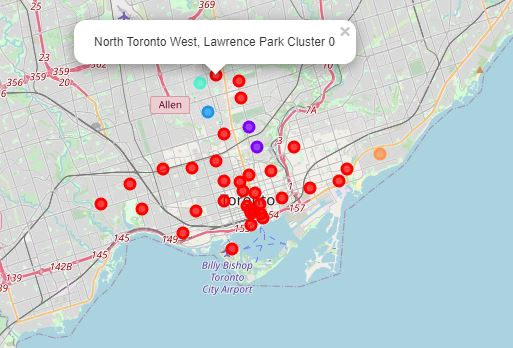